## Data Loading

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
file_path = '240710_FIELD_Exp1_control_FeacturesSelected_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,Genotype,DAS,Time.of.Day,light_intensity,Ambient.Humidity,Ambient.Temperature,pressure,SPAD_650,SPAD_730,SPAD_880,LEF
0,BCC1367,47,13.738333,363,45.352539,24.080000,1017.005798,16.03,-23.68,-5.25,83.413
1,BCC1368,47,13.801944,435,47.352539,24.209999,1016.984558,51.60,-10.55,-2.57,98.975
2,BCC1370,47,13.830278,385,47.044922,23.990000,1016.983154,26.27,-25.69,-6.32,90.183
3,BCC1371,47,13.861389,377,48.463867,24.100000,1016.962891,49.28,-11.32,-2.07,85.360
4,BCC1372,47,13.900556,382,46.199219,24.030001,1016.949707,41.75,-14.27,-2.94,88.741


## Determine Feature Importance Using Random Forest


Feature importances:
               Feature  Importance
2      light_intensity    0.944007
8             SPAD_880    0.011350
1          Time.of.Day    0.009344
6             SPAD_650    0.007609
4  Ambient.Temperature    0.007013
7             SPAD_730    0.006649
5             pressure    0.005943
3     Ambient.Humidity    0.005757
0                  DAS    0.002327


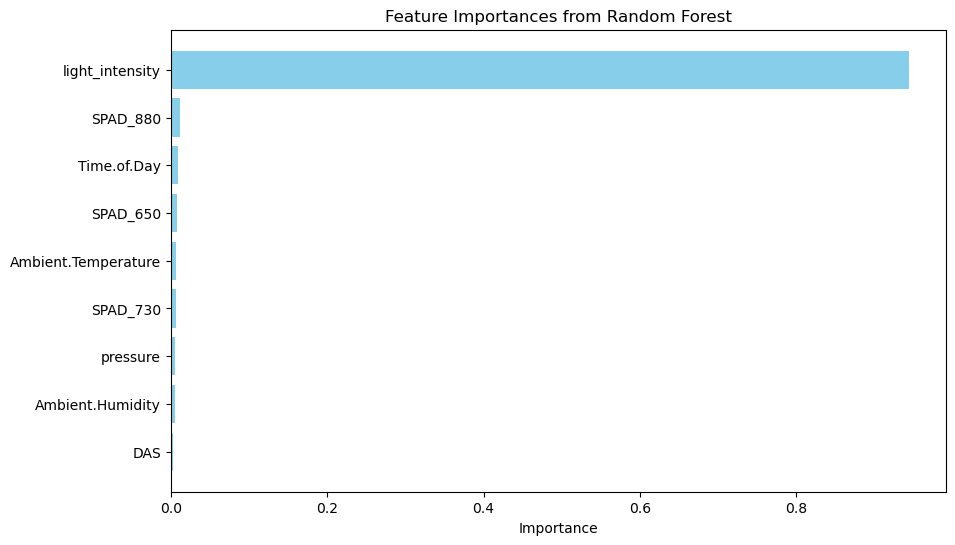

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Exclude 'Genotype´
X = X.drop(columns=['Genotype'])

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

## OPTIONAL: Manual feature selection

In [ ]:
print(data.columns.tolist())

['Genotype', 'DAS', 'Time.of.Day', 'light_intensity', 'Ambient.Humidity', 'Ambient.Temperature', 'pressure', 'SPAD_650', 'SPAD_730', 'SPAD_880', 'LEF']


In [ ]:
# Define the list of features to keep and the tartget
selected_features = ['Genotype', 'Time.of.Day', 'light_intensity', 'Ambient.Humidity', 'Ambient.Temperature', 'SPAD_650', 'SPAD_880', 'LEF']
selected_features = ['Genotype', 'light_intensity', 'LEF']
selected_features = ['light_intensity', 'LEF']

# Select only the specified features from the DataFrame
data = data[selected_features].copy()

# Display the first few rows
data.head()

,light_intensity,LEF
0,363,83.413
1,435,98.975
2,385,90.183
3,377,85.360
4,382,88.741


## 3D plot

### LEF vs light_intensity + Ambient.Temperature

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Define the variables for the 3D plot
x = data['light_intensity']
y = data['Ambient.Temperature']
z = data['LEF']

# Create an interactive 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3,
        color=z,                # set color to the 'LEF' values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Set labels
fig.update_layout(
    scene=dict(
        xaxis_title='Light Intensity',
        yaxis_title='Ambient Temperature',
        zaxis_title='LEF'
    ),
    title='Interactive 3D Plot of LEF vs Light Intensity and Ambient Temperature'
)

# Show plot
fig.show()

### LEF vs light_intensity + Ambient.Humidity

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Define the variables for the 3D plot
x = data['light_intensity']
y = data['Ambient.Humidity']
z = data['LEF']

# Create an interactive 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3,
        color=z,                # set color to the 'LEF' values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Set labels
fig.update_layout(
    scene=dict(
        xaxis_title='Light Intensity',
        yaxis_title='Ambient Humidity',
        zaxis_title='LEF'
    ),
    title='Interactive 3D Plot of LEF vs Light Intensity and Ambient Humidity'
)

# Show plot
fig.show()

## Fit LEF vs light_intensity

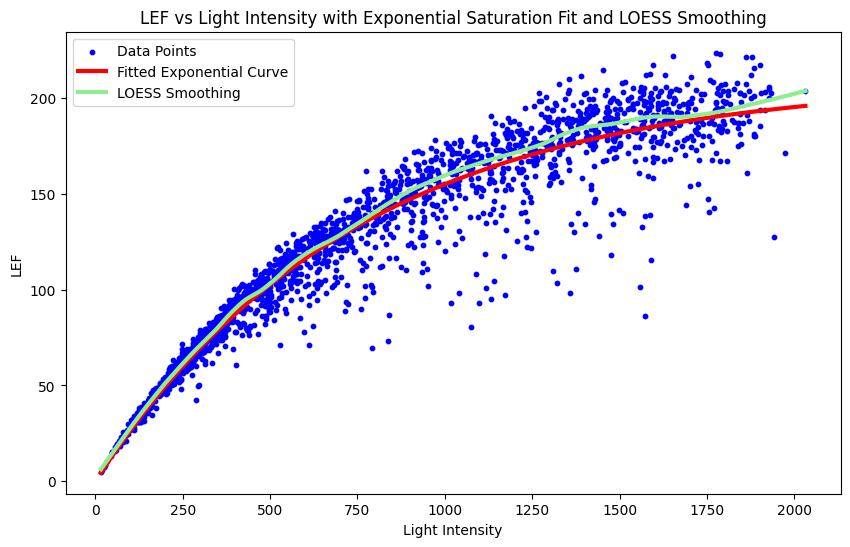

Fitted parameters: a=209.47370641002627, b=0.0013465039611050345


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.nonparametric.smoothers_lowess import lowess

# Define the variables for the plot
x = data['light_intensity']
y = data['LEF']

# Define the exponential saturation function
def exp_saturation(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit the exponential saturation function to the data
popt, pcov = curve_fit(exp_saturation, x, y, bounds=(0, [np.inf, np.inf]))

# Fit the LOESS curve
loess_smoothed = lowess(y, x, frac=0.1)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', color='blue', s=10)  # Adjust point size with `s`

# Plot the fitted exponential saturation curve
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = exp_saturation(x_fit, *popt)
plt.plot(x_fit, y_fit, label='Fitted Exponential Curve', color='red', linewidth=3)  # Adjust line width with `linewidth`

# Plot the LOESS smoothing curve
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], label='LOESS Smoothing', color='lightgreen', linewidth=3)  # Adjust line width with `linewidth`

# Set labels and title
plt.xlabel('Light Intensity')
plt.ylabel('LEF')
plt.title('LEF vs Light Intensity with Exponential Saturation Fit and LOESS Smoothing')
plt.legend()

# Show plot
plt.show()

# Print the parameters
print(f"Fitted parameters: a={popt[0]}, b={popt[1]}")


### First derivative

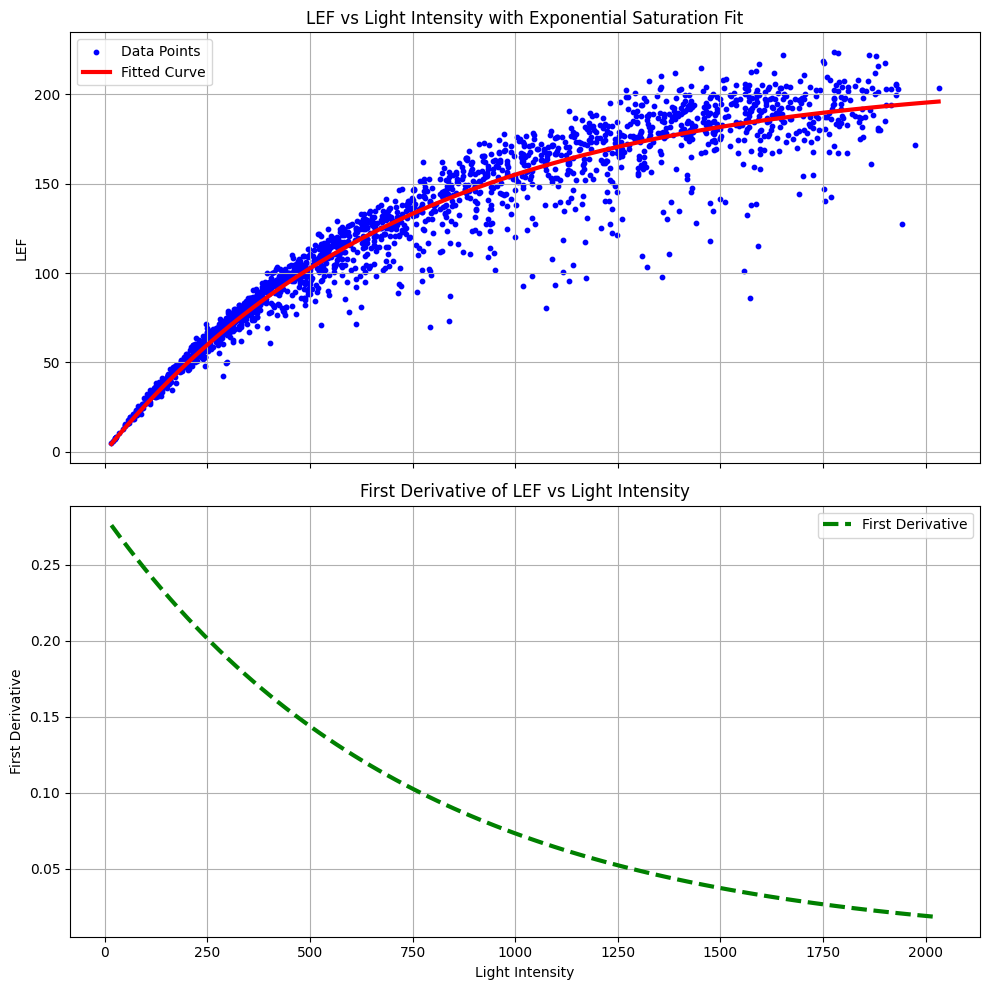

Fitted parameters: a=209.47370641002627, b=0.0013465039611050345


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the variables for the plot
x = data['light_intensity']
y = data['LEF']

# Define the exponential saturation function
def exp_saturation(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit the exponential saturation function to the data
popt, _ = curve_fit(exp_saturation, x, y, bounds=(0, [np.inf, np.inf]))

# Define the first derivative of the exponential saturation function
def exp_saturation_derivative(x, a, b):
    return a * b * np.exp(-b * x)

# Calculate the fitted curve
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = exp_saturation(x_fit, *popt)

# Calculate the first derivative
y_derivative = exp_saturation_derivative(x_fit, *popt)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot the data points and the fitted curve
ax1.scatter(x, y, label='Data Points', color='blue', s=10)  # Adjust point size with `s`
ax1.plot(x_fit, y_fit, label='Fitted Curve', color='red', linewidth=3)  # Adjust line width with `linewidth`
ax1.set_ylabel('LEF')
ax1.set_title('LEF vs Light Intensity with Exponential Saturation Fit')
ax1.legend()
ax1.grid(True)

# Plot the first derivative
ax2.plot(x_fit, y_derivative, label='First Derivative', color='green', linewidth=3, linestyle='--')  # Adjust line width with `linewidth`
ax2.set_xlabel('Light Intensity')
ax2.set_ylabel('First Derivative')
ax2.set_title('First Derivative of LEF vs Light Intensity')
ax2.legend()
ax2.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# Print the parameters
print(f"Fitted parameters: a={popt[0]}, b={popt[1]}")

#                     XGBoost

## XGBoost: Hyperparameter Tuning and Model Training

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import numpy as np

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Encoding categorical variable
X = pd.get_dummies(X, columns=['Genotype'], drop_first=True)

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the training and testing sets
X_train.shape, X_test.shape

((1583, 110), (396, 110))

In [ ]:
# Define the parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.4, 0.6, 0.8, 1.0],
    'max_depth': [2, 3, 5, 7],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform random search with cross-validation
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters from random search
best_params = random_search.best_params_

# Train the final model with the best parameters
best_model = XGBRegressor(**best_params, objective='reg:squarederror')
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
correlation_coefficient, _ = pearsonr(y_test, y_pred)

# Output the best parameters and metrics
print("Best Parameters:", best_params)
print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)
print("r:", correlation_coefficient)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.4, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
RMSE: 12.286705019240642
MAPE: 0.07831878384894107
MAE: 8.24557348280242
r: 0.9726893304561655


## Interactive 3D Surface Plot

In [ ]:
best_params

{'subsample': 0.8,
 'n_estimators': 300,
 'max_depth': 2,
 'learning_rate': 0.05,
 'colsample_bytree': 1.0}

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Define the features and target
features = ['light_intensity', 'Ambient.Temperature']
X = data[features]
y = data['LEF']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters (use the same as in the previous model training)
hyperparameters = {
    'objective': 'reg:squarederror',
    'n_estimators': 300,
    'learning_rate': 0.05,
    'max_depth': 2,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'random_state': 42
}

# Train the XGBoost model with the specified hyperparameters
import xgboost as xgb
model = xgb.XGBRegressor(**hyperparameters)
model.fit(X_train, y_train)

# Create a grid of light_intensity and Ambient.Temperature values
light_intensity_range = np.linspace(data['light_intensity'].min(), data['light_intensity'].max(), 100)
ambient_temperature_range = np.linspace(data['Ambient.Temperature'].min(), data['Ambient.Temperature'].max(), 100)
light_intensity_grid, ambient_temperature_grid = np.meshgrid(light_intensity_range, ambient_temperature_range)

# Flatten the grid to make predictions
grid_flattened = np.c_[light_intensity_grid.ravel(), ambient_temperature_grid.ravel()]

# Predict LEF values for the grid
lef_predictions = model.predict(grid_flattened)
lef_predictions = lef_predictions.reshape(light_intensity_grid.shape)

# Create an interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=lef_predictions, x=light_intensity_grid, y=ambient_temperature_grid, colorscale='Viridis')])

# Set labels
fig.update_layout(
    scene=dict(
        xaxis_title='Light Intensity',
        yaxis_title='Ambient Temperature',
        zaxis_title='LEF'
    ),
    title='Interactive 3D Surface Plot of LEF vs Light Intensity and Ambient Temperature (XGBoost Model)'
)

# Show plot
fig.show()


## Plot the predicted vs actual values

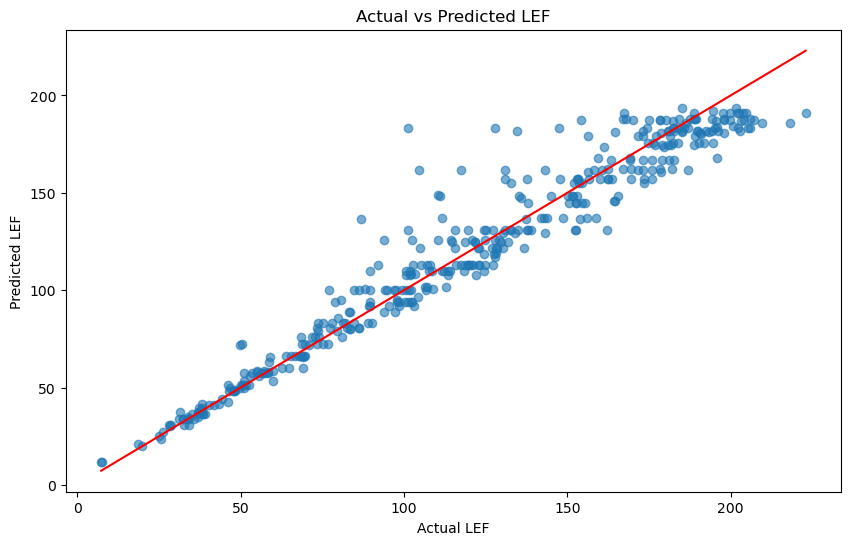

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual LEF')
plt.ylabel('Predicted LEF')
plt.title('Actual vs Predicted LEF')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()

## Plot Error vs LEF

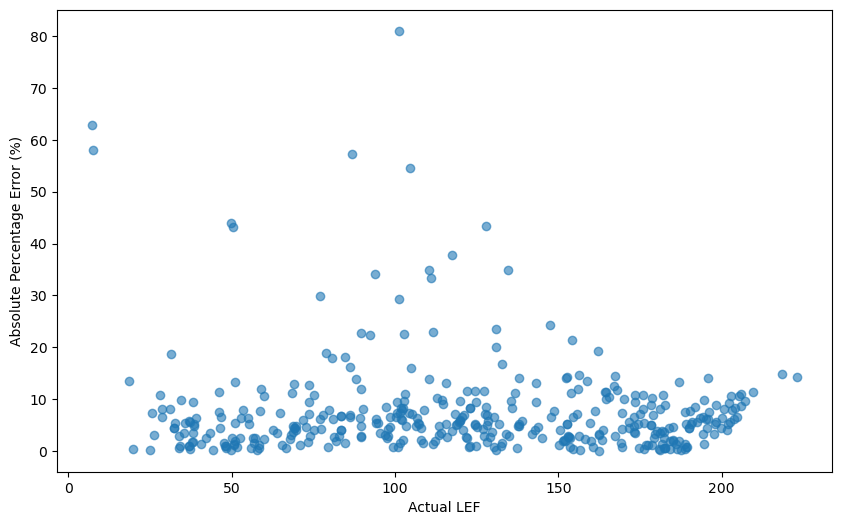

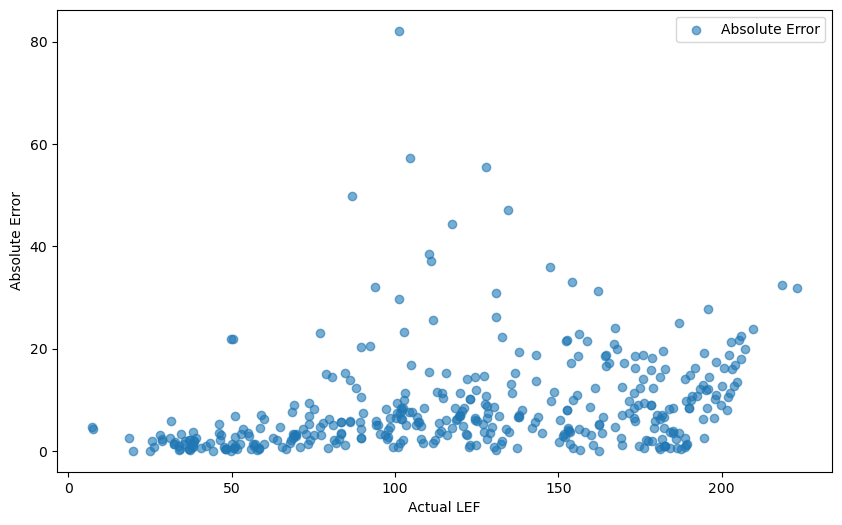

In [ ]:
# Calculate individual absolute percentage errors and absolute errors
individual_ape = np.abs((y_test - y_pred) / y_test) * 100
individual_ae = np.abs(y_test - y_pred)

# Plot APE vs LEF
plt.figure(figsize=(10, 6))
plt.scatter(y_test, individual_ape, alpha=0.6)
plt.xlabel('Actual LEF')
plt.ylabel('Absolute Percentage Error (%)')
#plt.title('APE vs Actual LEF')
plt.show()

# Plot Absolute Error vs LEF
plt.figure(figsize=(10, 6))
plt.scatter(y_test, individual_ae, alpha=0.6, label='Absolute Error')
plt.xlabel('Actual LEF')
plt.ylabel('Absolute Error')
#plt.title('Absolute Error vs Actual LEF')
plt.legend()
plt.show()

# Random Forest, LightGBM, XGBoost and CatBoost

## Run Random Forest, LightGBM, and XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Encoding categorical variable
X = pd.get_dummies(X, columns=['Genotype'], drop_first=True)

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for random search
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_features': [1.0, 'sqrt'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'num_leaves': [31, 50, 100],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100, 200],
        'subsample': [0.6, 0.8, 1.0]
    }
}

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42)
}

# Adjust n_iter to avoid the warning about the parameter space being smaller
n_iter_search = 27  # Adjust this number based on the smallest grid size

best_models = {}
results = {}

for model_name in models:
    model = models[model_name]
    param_grid = param_grids[model_name]

    random_search = RandomizedSearchCV(
        model, param_distributions=param_grid, n_iter=n_iter_search,
        scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42, n_jobs=-1
    )

    random_search.fit(X_train, y_train)
    best_models[model_name] = random_search.best_estimator_
    y_pred = random_search.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    correlation_coefficient, _ = pearsonr(y_test, y_pred)

    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'MAE': mae, 'r': correlation_coefficient}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2056
[LightGBM] [Info] Number of data points in the train set: 1583, number of used features: 10
[LightGBM] [Info] Start training from score 122.067233


## Run CatBoost and Combine Results

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 1.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify categorical features
categorical_features = ['Genotype']

# Define the parameter grid for random search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7]
}

# Initialize the CatBoost regressor
catboost_model = CatBoostRegressor(loss_function='RMSE', random_state=42, silent=True)

# Perform random search with cross-validation
random_search = RandomizedSearchCV(
    catboost_model, param_distributions=param_grid, n_iter=n_iter_search,
    scoring='neg_mean_squared_error', cv=5, verbose=1, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train, cat_features=categorical_features)

# Best model
best_catboost_model = random_search.best_estimator_
y_pred = best_catboost_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
correlation_coefficient, _ = pearsonr(y_test, y_pred)

# Output the best parameters and metrics
print("Best Parameters for CatBoost:", random_search.best_params_)
print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)
print("r:", correlation_coefficient)

# Add CatBoost results to the results DataFrame
results_df.loc['CatBoost'] = [rmse, mape, mae, correlation_coefficient]

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for CatBoost: {'learning_rate': 0.05, 'iterations': 200, 'depth': 3}
RMSE: 12.22611505543829
MAPE: 0.0771993452769995
MAE: 8.291659633094374
r: 0.9729881227689169


## Display all results

In [ ]:
print(results_df)

                   RMSE      MAPE       MAE         r
RandomForest  12.301703  0.069710  8.250631  0.972640
XGBoost       12.389297  0.070595  8.180275  0.972253
LightGBM      12.308334  0.073902  8.221249  0.972601
CatBoost      12.226115  0.077199  8.291660  0.972988


## Plot the Combined Results

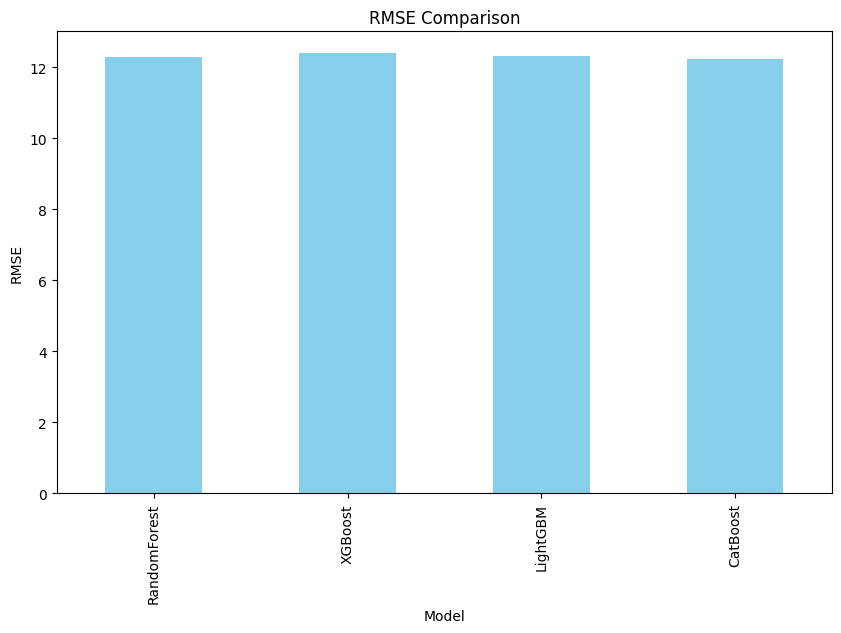

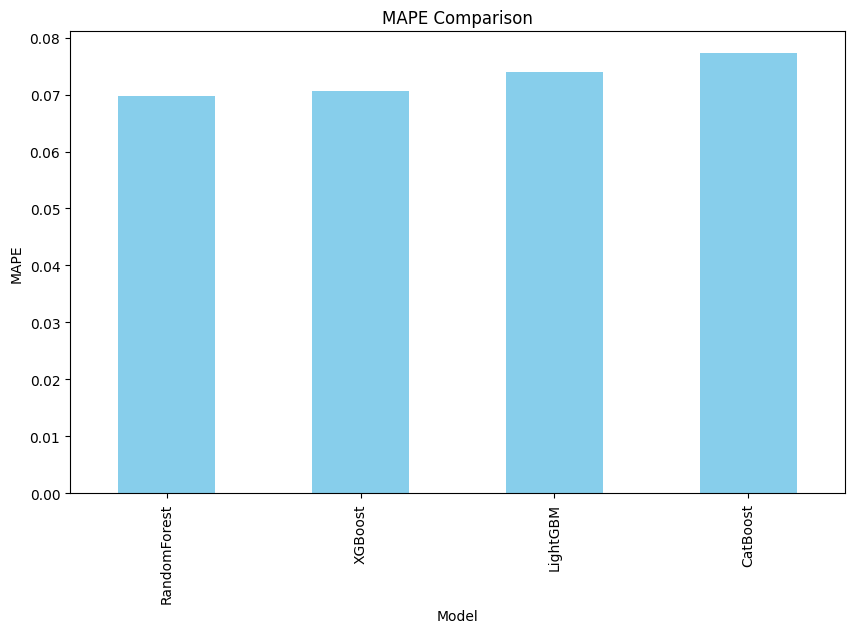

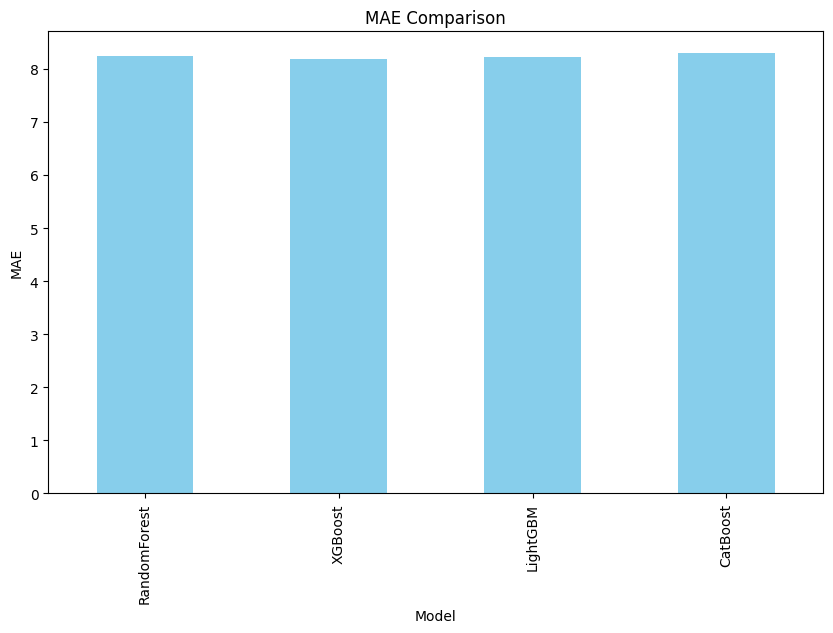

In [ ]:
# Plot RMSE
plt.figure(figsize=(10, 6))
results_df['RMSE'].plot(kind='bar', color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

# Plot MAPE
plt.figure(figsize=(10, 6))
results_df['MAPE'].plot(kind='bar', color='skyblue')
plt.title('MAPE Comparison')
plt.ylabel('MAPE')
plt.xlabel('Model')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
results_df['MAE'].plot(kind='bar', color='skyblue')
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()

## Identify the Best Algorithm

In [ ]:
# Determine the best model based on RMSE, MAPE or MAE
best_model_name = results_df['MAE'].idxmin()
best_model_params = None

if best_model_name in best_models:
    best_model = best_models[best_model_name]
    best_model_params = best_model.get_params()
elif best_model_name == 'CatBoost':
    best_model = best_catboost_model
    best_model_params = random_search.best_params_

print(f"The best model is: {best_model_name}")
print("Best hyperparameter combination:")
print(best_model_params)

The best model is: XGBoost
Best hyperparameter combination:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1.0, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


##  Train the Best Model on All Data

In [ ]:
# Train the best model on all data
if best_model_name in ['RandomForest', 'XGBoost', 'LightGBM']:
    X_full = pd.get_dummies(X, columns=['Genotype'], drop_first=True)
    best_model.fit(X_full, y)
else:
    best_model.fit(X, y, cat_features=categorical_features)

# Output the best hyperparameter combination
print(f"Best hyperparameter combination for {best_model_name}:")
print(best_model_params)

Best hyperparameter combination for XGBoost:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 50, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1.0, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


# Neural Network

## Predict LEF Using Different Neural Network Models with Dropout

All variables in the dataset:
['Genotype', 'DAS', 'Time.of.Day', 'light_intensity', 'Ambient.Humidity', 'Ambient.Temperature', 'pressure', 'SPAD_650', 'SPAD_730', 'SPAD_880', 'LEF']
Training Model_1...
13/13 [==============================] - 0s 2ms/step


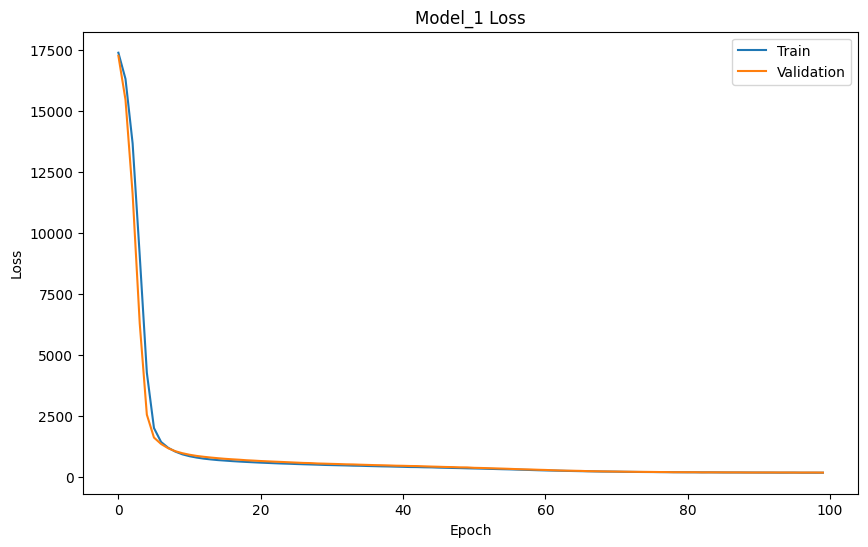

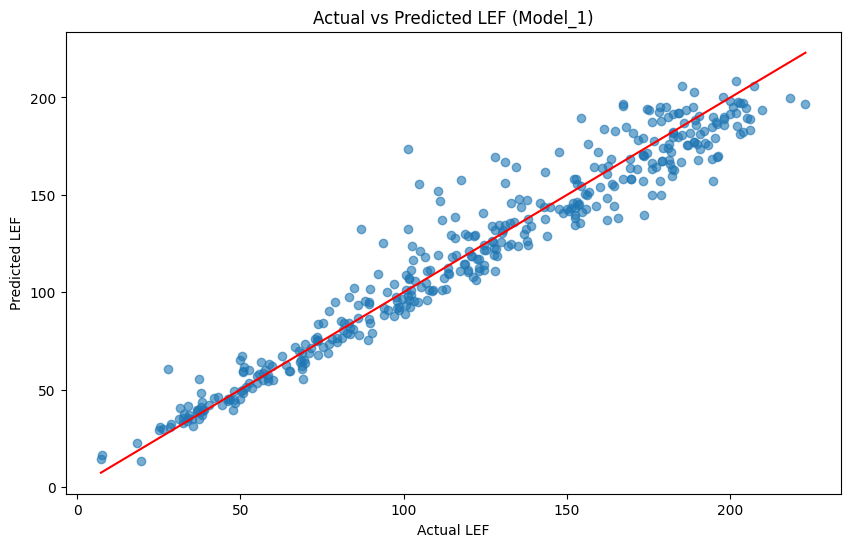

Training Model_2...
13/13 [==============================] - 0s 2ms/step


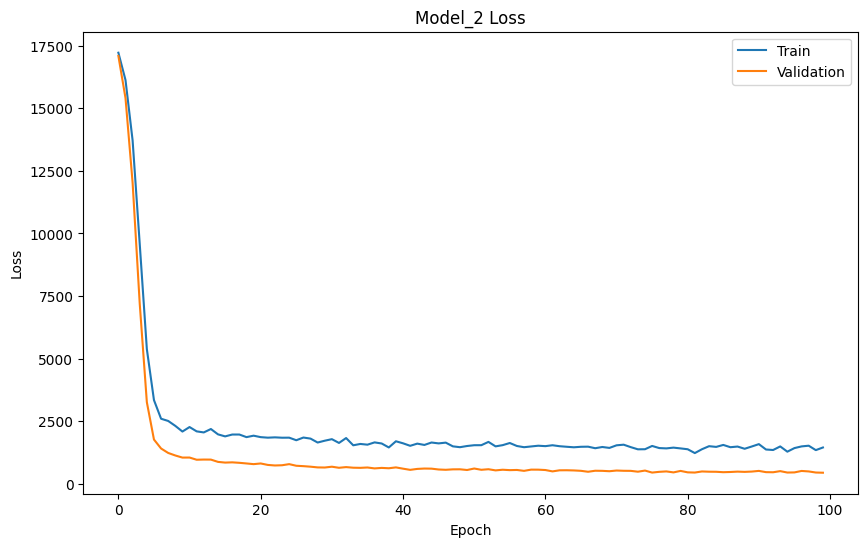

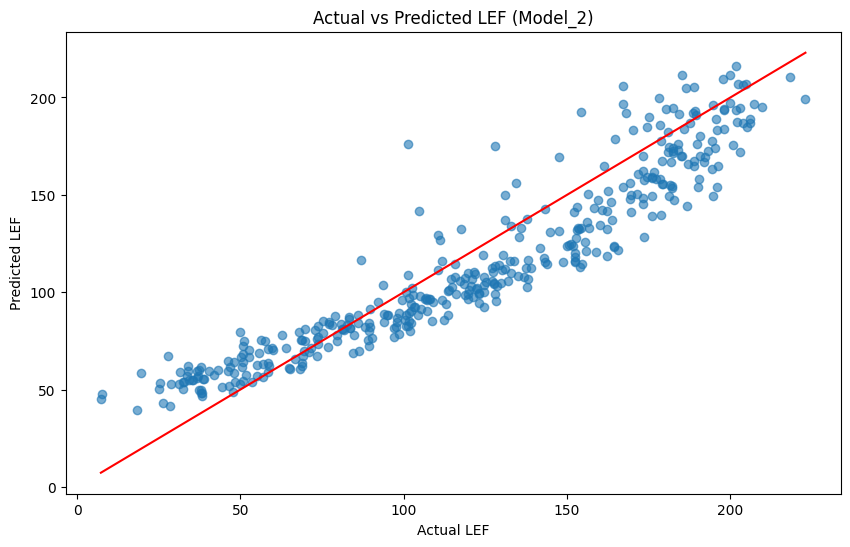

Training Model_3...
13/13 [==============================] - 0s 2ms/step


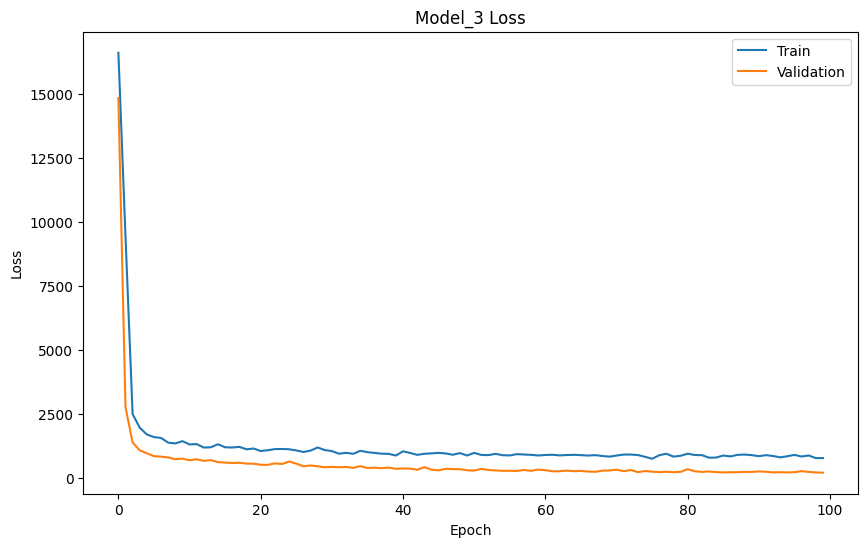

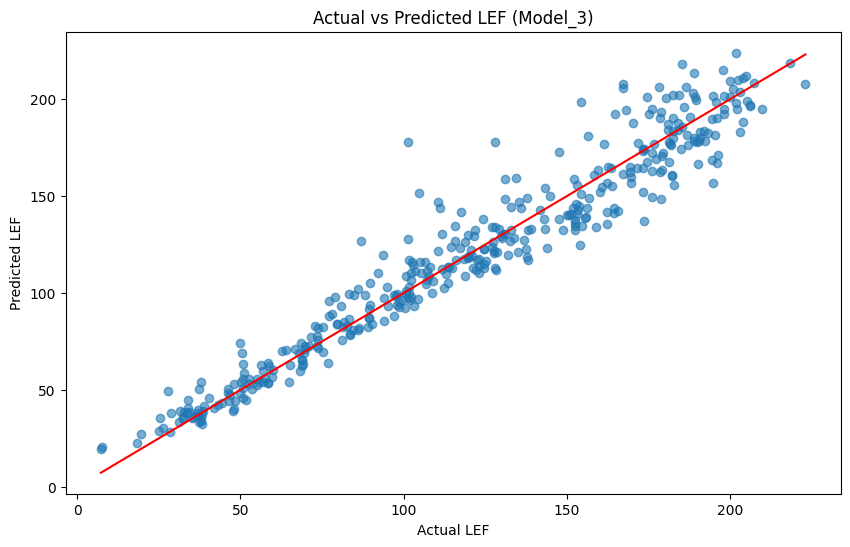

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
file_path = '240710_FIELD_Exp1_control_FeacturesSelected_data.csv'
data = pd.read_csv(file_path)

# Display all columns in the DataFrame
print("All variables in the dataset:")
print(data.columns.tolist())

# Define the list of features to keep (excluding 'Genotype')
selected_features = ['DAS', 'Time.of.Day', 'light_intensity', 'Ambient.Humidity', 'Ambient.Temperature', 'pressure', 'SPAD_650', 'SPAD_730', 'SPAD_880']

# Add the target variable to the list of selected features
selected_features.append('LEF')

# Select only the specified features from the DataFrame and overwrite the original 'data' DataFrame
data = data[selected_features]

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define different neural network models
def create_model_1(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

def create_model_2(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    return model

def create_model_3(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1)
    ])
    return model

# List of models to try
models = [
    ('Model_1', create_model_1),
    ('Model_2', create_model_2),
    ('Model_3', create_model_3)
]

# Train and evaluate each model
results = {}

for model_name, create_model in models:
    print(f"Training {model_name}...")
    model = create_model(X_train.shape[1])

    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'MAE': mae}

    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
    plt.xlabel('Actual LEF')
    plt.ylabel('Predicted LEF')
    plt.title(f'Actual vs Predicted LEF ({model_name})')
    plt.show()

In [ ]:
# Display the results
results_df = pd.DataFrame(results).T
print("\nPerformance comparison:")
print(results_df)


Performance comparison:
              RMSE      MAPE        MAE
Model_1  12.901018  0.089244   9.273800
Model_2  19.595746  0.199196  16.323600
Model_3  13.390021  0.095967   9.605307


## Complete Code with Early Stopping

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
file_path = '240710_FIELD_Exp1_control_FeacturesSelected_data.csv'
data = pd.read_csv(file_path)

# Display all columns in the DataFrame
print("All variables in the dataset:")
print(data.columns.tolist())

# Define the list of features to keep (excluding 'Genotype')
selected_features = ['DAS', 'Time.of.Day', 'light_intensity', 'Ambient.Humidity', 'Ambient.Temperature', 'pressure', 'SPAD_650', 'SPAD_730', 'SPAD_880']

# Add the target variable to the list of selected features
selected_features.append('LEF')

# Select only the specified features from the DataFrame and overwrite the original 'data' DataFrame
data = data[selected_features]

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define different neural network models
def create_model_1(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

def create_model_2(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])
    return model

def create_model_3(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1)
    ])
    return model

# List of models to try
models = [
    ('Model_1', create_model_1),
    ('Model_2', create_model_2),
    ('Model_3', create_model_3)
]

# Train and evaluate each model
results = {}

for model_name, create_model in models:
    print(f"Training {model_name}...")
    model = create_model(X_train.shape[1])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'MAE': mae}

    # Plot training & validation loss values
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
    plt.xlabel('Actual LEF')
    plt.ylabel('Predicted LEF')
    plt.title(f'Actual vs Predicted LEF ({model_name})')
    plt.show()



In [ ]:
# Display the results
results_df = pd.DataFrame(results).T
print("\nPerformance comparison:")
print(results_df)


Performance comparison:
              RMSE      MAPE        MAE
Model_1  12.789094  0.081299   8.685026
Model_2  20.266452  0.204664  16.769865
Model_3  13.638347  0.094602  10.127552


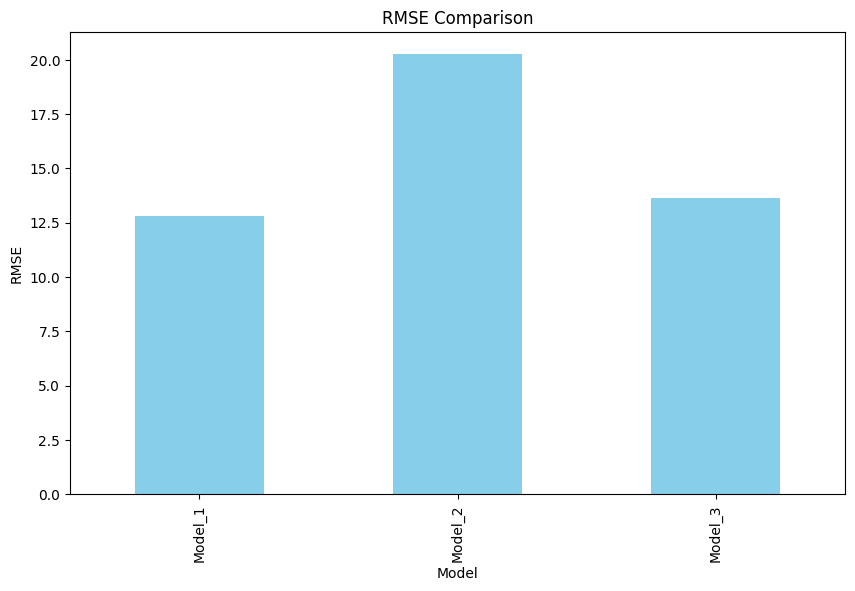

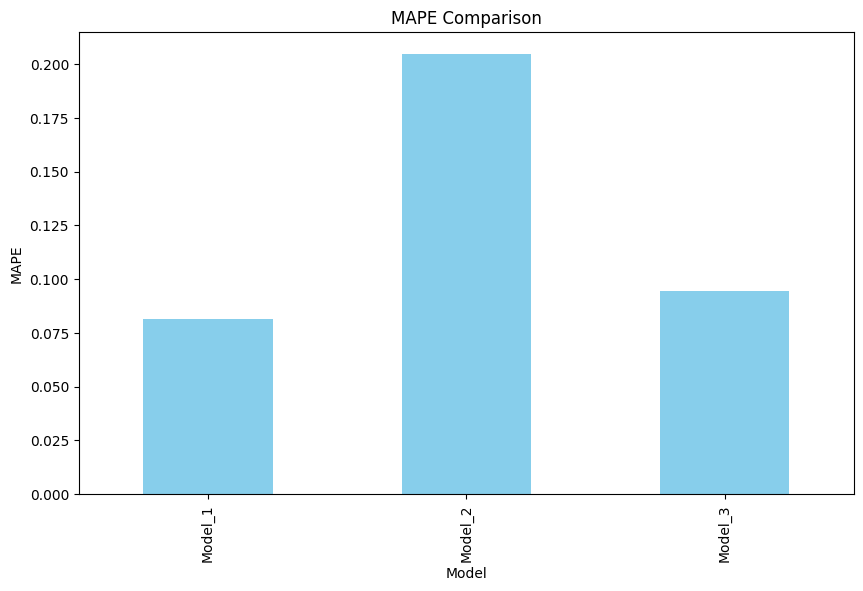

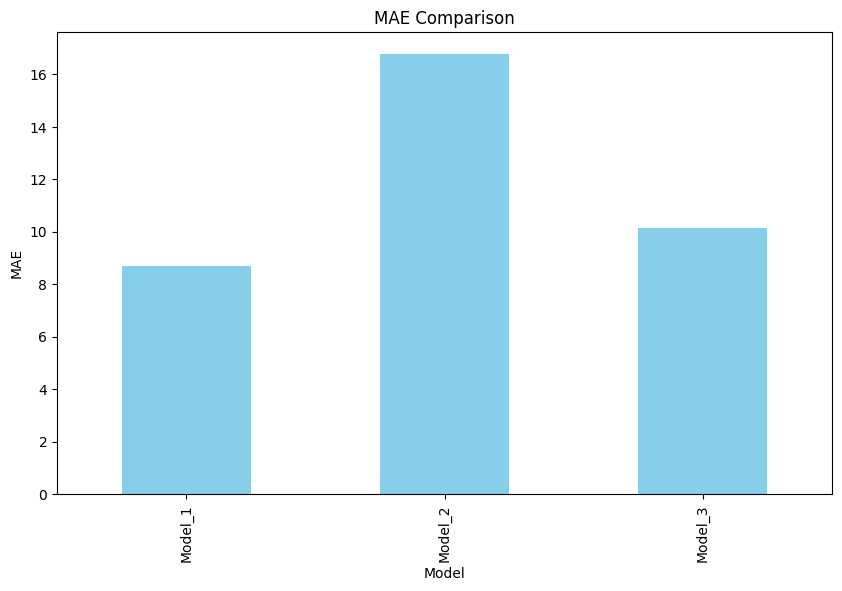

In [ ]:
# Plot the performance metrics for each model
for metric in ['RMSE', 'MAPE', 'MAE']:
    plt.figure(figsize=(10, 6))
    results_df[metric].plot(kind='bar', color='skyblue')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.show()

## Complete Code with Keras Tuner for Hyperparameter Tuning

Trial 10 Complete [00h 00m 19s]
val_loss: 241.79928588867188

Best val_loss So Far: 172.7309112548828
Total elapsed time: 00h 03m 54s
13/13 [==============================] - 0s 4ms/step

Performance metrics of the best model:
RMSE: 13.07622174783106
MAPE: 0.08811299167202598
MAE: 9.448473437395963

Best hyperparameters:
{'units_1': 96, 'dropout_1': 0.0, 'units_2': 96, 'dropout_2': 0.4, 'units_3': 96, 'dropout_3': 0.2, 'optimizer': 'rmsprop'}


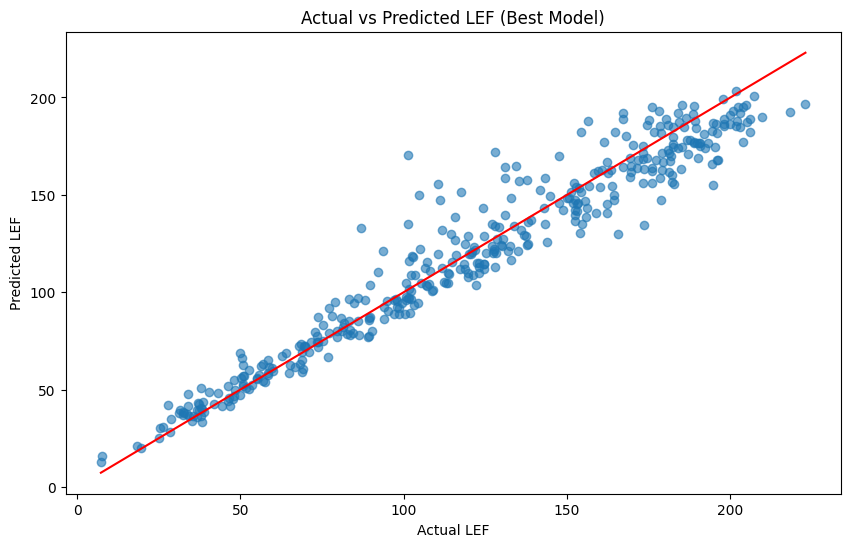

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt

# Load the data
file_path = '240710_FIELD_Exp1_control_FeacturesSelected_data.csv'
data = pd.read_csv(file_path)

# Display all columns in the DataFrame
print("All variables in the dataset:")
print(data.columns.tolist())

# Define the list of features to keep (excluding 'Genotype')
selected_features = ['DAS', 'Time.of.Day', 'light_intensity', 'Ambient.Humidity', 'Ambient.Temperature', 'pressure', 'SPAD_650', 'SPAD_730', 'SPAD_880']

# Add the target variable to the list of selected features
selected_features.append('LEF')

# Select only the specified features from the DataFrame and overwrite the original 'data' DataFrame
data = data[selected_features]

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units_3', min_value=16, max_value=128, step=16), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=1,
                        directory='my_dir',
                        project_name='LEF_tuning')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("\nPerformance metrics of the best model:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"MAE: {mae}")

# Print the best hyperparameters
print("\nBest hyperparameters:")
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual LEF')
plt.ylabel('Predicted LEF')
plt.title('Actual vs Predicted LEF (Best Model)')
plt.show()


## Complete Code with Keras Tuner for Hyperparameter Tuning, Including Variable Number of Layers

Trial 10 Complete [00h 00m 16s]
val_loss: 184.411865234375

Best val_loss So Far: 171.55197143554688
Total elapsed time: 00h 03m 57s
13/13 [==============================] - 0s 2ms/step

Performance metrics of the best model:
RMSE: 12.787690512910226
MAPE: 0.08739037173979211
MAE: 9.118354554455689

Best hyperparameters:
{'units_1': 112, 'num_layers': 2, 'units_2': 96, 'dropout_2': False, 'optimizer': 'adam', 'units_3': 32, 'dropout_3': True, 'units_4': 48, 'dropout_4': False, 'dropout_rate_3': 0.0}


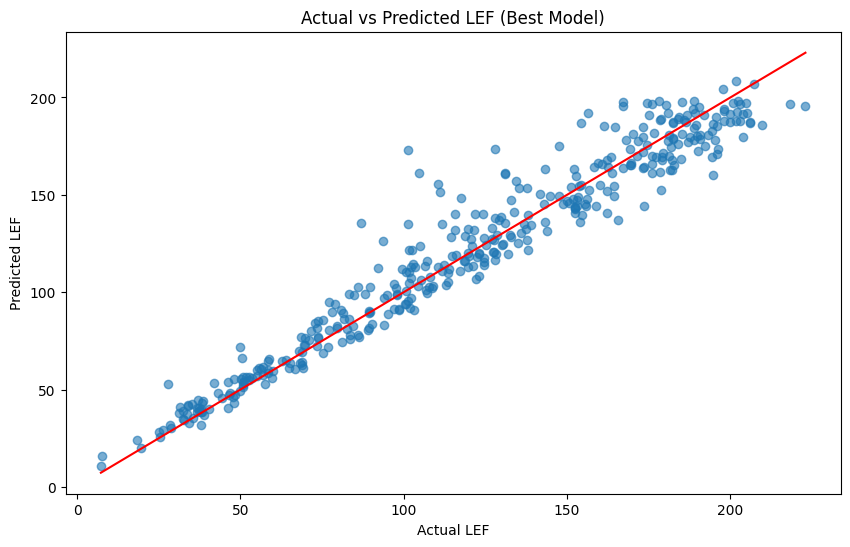

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import kerastuner as kt
import shutil
import os

# Clear any previous tuner directory to avoid conflicts
tuner_dir = 'my_dir/LEF_tuning'
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

# Load the data
file_path = '240710_FIELD_Exp1_control_FeacturesSelected_data.csv'
data = pd.read_csv(file_path)

# Display all columns in the DataFrame
print("All variables in the dataset:")
print(data.columns.tolist())

# Define the list of features to keep (excluding 'Genotype')
selected_features = ['DAS', 'Time.of.Day', 'light_intensity', 'Ambient.Humidity', 'Ambient.Temperature', 'pressure', 'SPAD_650', 'SPAD_730', 'SPAD_880']

# Add the target variable to the list of selected features
selected_features.append('LEF')

# Select only the specified features from the DataFrame and overwrite the original 'data' DataFrame
data = data[selected_features]

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16), activation='relu', input_dim=X_train.shape[1]))

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16), activation='relu'))
        if hp.Boolean(f'dropout_{i+2}'):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=1,
                        directory='my_dir',
                        project_name='LEF_tuning')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("\nPerformance metrics of the best model:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"MAE: {mae}")

# Print the best hyperparameters
print("\nBest hyperparameters:")
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual LEF')
plt.ylabel('Predicted LEF')
plt.title('Actual vs Predicted LEF (Best Model)')
plt.show()

## Complete Code with One-Hot Encoding for Genotype and Keras Tuner for Hyperparameter Tuning

Trial 10 Complete [00h 00m 22s]
val_loss: 346.949462890625

Best val_loss So Far: 319.37225341796875
Total elapsed time: 00h 02m 46s
13/13 [==============================] - 0s 4ms/step

Performance metrics of the best model:
RMSE: 17.138174129309252
MAPE: 0.14898899504110583
MAE: 13.374419726988284

Best hyperparameters:
{'units_1': 96, 'num_layers': 3, 'units_2': 48, 'dropout_2': False, 'optimizer': 'adam', 'dropout_rate_2': 0.1, 'units_3': 32, 'dropout_3': True, 'units_4': 128, 'dropout_4': False, 'dropout_rate_3': 0.0}


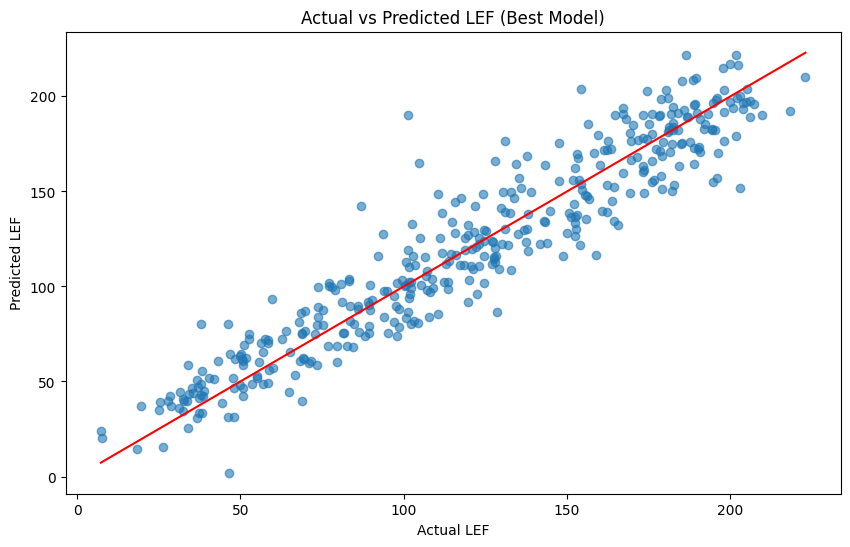

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import shutil
import os

# Clear any previous tuner directory to avoid conflicts
tuner_dir = 'my_dir/LEF_tuning'
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

# Load the data
file_path = '240710_FIELD_Exp1_control_FeacturesSelected_data.csv'
data = pd.read_csv(file_path)

# Display all columns in the DataFrame
print("All variables in the dataset:")
print(data.columns.tolist())

# Define the list of features to keep (including 'Genotype')
selected_features = ['Genotype', 'DAS', 'Time.of.Day', 'light_intensity', 'Ambient.Humidity', 'Ambient.Temperature', 'pressure', 'SPAD_650', 'SPAD_730', 'SPAD_880']

# Add the target variable to the list of selected features
selected_features.append('LEF')

# Select only the specified features from the DataFrame and overwrite the original 'data' DataFrame
data = data[selected_features]

# One-hot encode the 'Genotype' column
data = pd.get_dummies(data, columns=['Genotype'], drop_first=True)

# Prepare the data
X = data.drop(columns=['LEF'])
y = data['LEF']

# Splitting the data into training and testing sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16), activation='relu', input_dim=X_train.shape[1]))

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16), activation='relu'))
        if hp.Boolean(f'dropout_{i+2}'):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=10,
                        executions_per_trial=1,
                        directory='my_dir',
                        project_name='LEF_tuning')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("\nPerformance metrics of the best model:")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"MAE: {mae}")

# Print the best hyperparameters
print("\nBest hyperparameters:")
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual LEF')
plt.ylabel('Predicted LEF')
plt.title('Actual vs Predicted LEF (Best Model)')
plt.show()